<a href="https://colab.research.google.com/github/AndreyDyachkov/RDF_SPARQL/blob/main/RDF_SPARQL_T4_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RDF SPARQL T4 project knowledge base

### Task

Make a knowledge base on IDEF0 diagrams

### Install rdflib library

In [1]:
!pip install rdflib

### Import libraries

In [2]:
from rdflib import *
#import plotly.graph_objects as go
from rdflib import URIRef, Graph, Namespace
#from rdflib.plugins.parsers.notation3 import N3Parser
#import os

### Import a knowledge base

In [3]:
filepath = '/content/drive/MyDrive/Colab Notebooks/SPB_PU_Amir/data/Project_knowledge_base_v1.n3'

In [4]:
f = open(filepath, "r")
print(f.read())

@prefix ind:<URN:inds:>.
@prefix prop:<URN:prop:>.
@prefix classes:<URN:class>.
@prefix rdfs:<http://www.w3.org/2000/01/rdf-schema#>.
@prefix owl: <http://www.w3.org/2002/07/owl#> .
@prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .


ind:process0 rdf:type classes:Process;
		rdfs:label "Detecting lung diseases from medical imaging";
		rdf:isDefinedBy	"T4 project group";
		prop:hasInput ind:kaggledataset;
        prop:hasInput ind:messagewithimage;
        prop:hasOutput ind:text;
        prop:hasKPI	ind:kpi0;
        prop:hasKPI	ind:kpi1;
        prop:hasKPI	ind:kpi2;
        prop:hasKPI	ind:kpi3;
        prop:hasResource ind:resource0;
        prop:hasResource ind:resource1;
        prop:hasResource ind:resource2.

ind:process01 prop:SubProcess ind:process0;
		rdfs:label "Dataset and input Vectorizing";
        prop:hasInput ind:kaggledataset;
        prop:hasInput ind:messagewithimage;
        prop:hasResource ind:resource1;
        prop:hasResource ind:resource1.

ind:proc

### Parsing the knowledge base

In [5]:
g = Graph()

In [6]:
results = g.parse(filepath, format="text/n3")
results

<Graph identifier=N6c17b66ceb194787b5ebe6b4fb703080 (<class 'rdflib.graph.Graph'>)>

In [7]:
print(len(results))

60


In [8]:
print(results.serialize(format="text/n3"))

@prefix classes: <URN:class> .
@prefix ind: <URN:inds:> .
@prefix prop: <URN:prop:> .
@prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .

ind:process01 rdfs:label "Dataset and input Vectorizing" ;
    prop:SubProcess ind:process0 ;
    prop:hasInput ind:kaggledataset,
        ind:messagewithimage ;
    prop:hasResource ind:resource1 .

ind:process02 rdfs:label "Neural network construction" ;
    prop:SubProcess ind:process0 ;
    prop:hasInput ind:process01 ;
    prop:hasKPI ind:kpi0,
        ind:kpi1,
        ind:kpi2 ;
    prop:hasOutput ind:process03 ;
    prop:hasResource ind:resource2 .

ind:process04 rdfs:label "Result output" ;
    prop:SubProcess ind:process0 ;
    prop:hasInput ind:process03 ;
    prop:hasOutput ind:text ;
    prop:hasResource ind:resource0,
        ind:resource1 .

ind:kaggledataset a classes:inputs ;
    rdfs:label "kaggledataset" .

ind:kpi0 a classes:KPI ;
    rdfs:label "Design topology" .


### SPARQL query

##### Task 1: getting the lable for "ind" which are in a class

In [17]:
query = g.query(
    """SELECT DISTINCT ?label ?classes
       WHERE {
          ?classes rdf:type classes:Process .
          ?classes rdfs:label ?label .
       }""")

In [18]:
dict ={}

In [19]:
for row in query:
  label = str(row.asdict()['label'].toPython())
  classes = str(row.asdict()['classes'].toPython()).split(":")[2]
  dict[label] = classes

In [20]:
dict

{'Detecting lung diseases from medical imaging': 'process0'}

In [21]:
for i in dict:
    print (i,'\t|', dict[i])

Detecting lung diseases from medical imaging 	| process0


##### Task 2: getting the lable for "ind" which are in a Sub Process property

In [23]:
q2 = g.query(
    """SELECT DISTINCT ?label ?prop
       WHERE {
          ?prop prop:SubProcess ?value .
          ?prop rdfs:label ?label .
       }""")

In [24]:
dict1 = {}

In [25]:
for row in q2:
  print(row)
  label = str(row.asdict()['label'].toPython())
  prop = str(row.asdict()['prop'].toPython()).split(":")[2]
  dict1[label] = prop

(rdflib.term.Literal('Dataset and input Vectorizing'), rdflib.term.URIRef('URN:inds:process01'))
(rdflib.term.Literal('Neural network construction'), rdflib.term.URIRef('URN:inds:process02'))
(rdflib.term.Literal('Data Recognition'), rdflib.term.URIRef('URN:inds:process03'))
(rdflib.term.Literal('Result output'), rdflib.term.URIRef('URN:inds:process04'))


In [26]:
dict1

{'Dataset and input Vectorizing': 'process01',
 'Neural network construction': 'process02',
 'Data Recognition': 'process03',
 'Result output': 'process04'}

In [27]:
for i in dict1:
  print (i,'\t|', dict1[i])

Dataset and input Vectorizing 	| process01
Neural network construction 	| process02
Data Recognition 	| process03
Result output 	| process04


### Visualization

In [28]:
import networkx as nx
from rdflib.extras.external_graph_libs import rdflib_to_networkx_multidigraph
import matplotlib.pyplot as plt

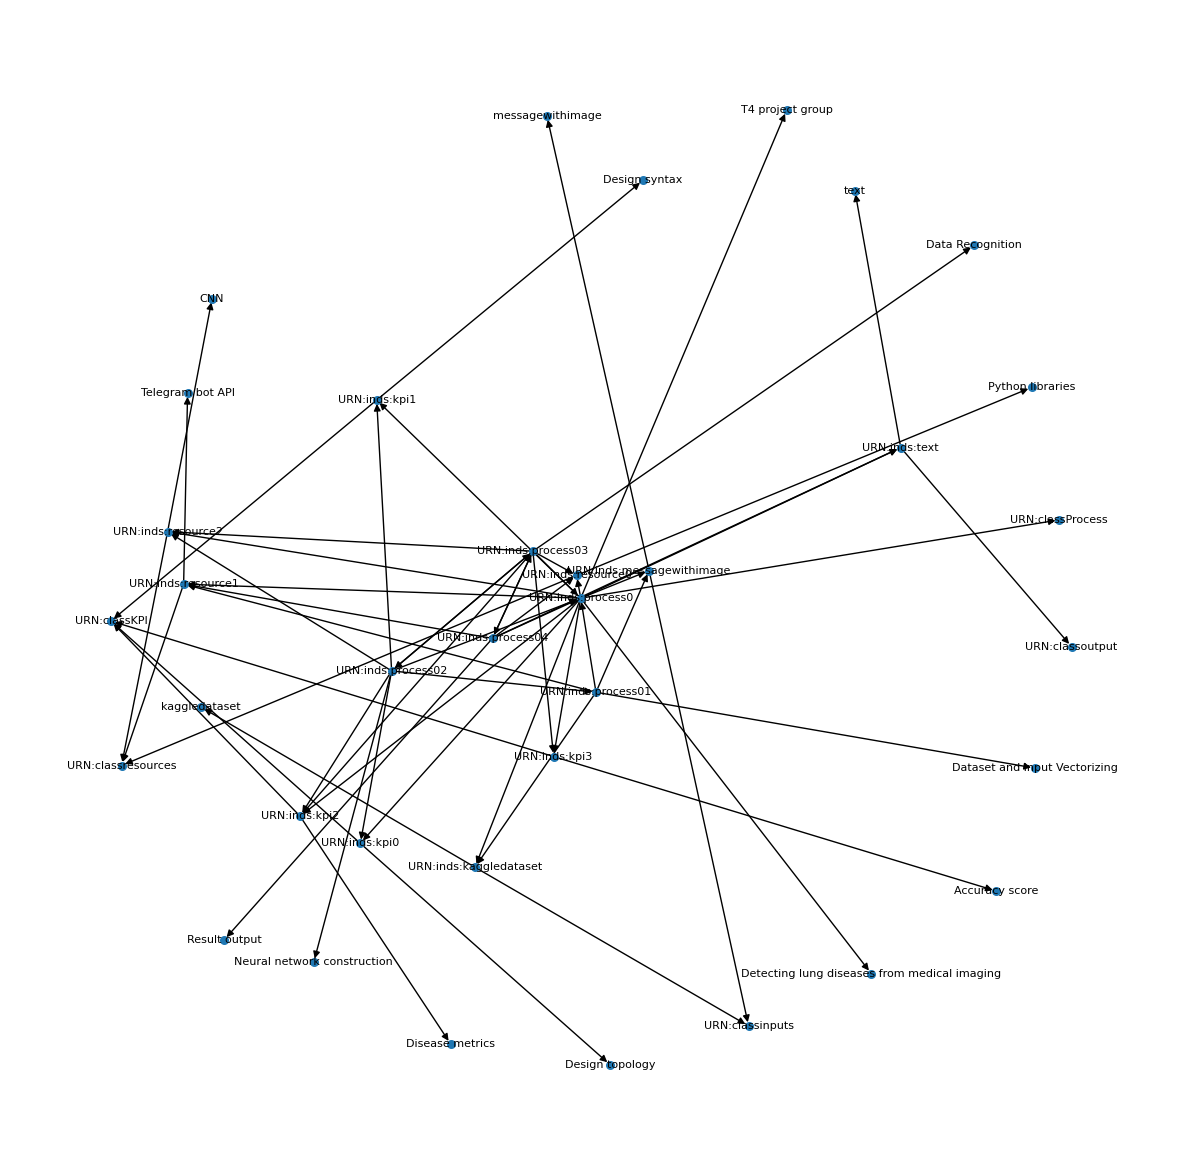

In [31]:
plt.figure(figsize=(15,15))
G = rdflib_to_networkx_multidigraph(results)
pos = nx.spring_layout(G, scale=2)
edge_labels = nx.get_edge_attributes(G, 'r')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
nx.draw(G, with_labels=True, node_size=30,font_size=8)
plt.show()